# Успеваемость первокурсников

Для 600 первокурсников известны показатели успеваемости по четырём предметам и результаты трёх психологических тестов. Как связаны эти два набора переменных?



In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
%matplotlib inline


In [2]:
data = pd.read_csv('./mmreg.csv')

In [3]:
%%time
data.head()

CPU times: user 312 µs, sys: 48 µs, total: 360 µs
Wall time: 339 µs


,locus_of_control,self_concept,motivation,read,write,math,science
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3


In [4]:
psych = data.loc[:, data.columns[:3]]
psych.head()

,locus_of_control,self_concept,motivation
0,-0.84,-0.24,1.00
1,-0.38,-0.47,0.67
2,0.89,0.59,0.67
3,0.71,0.28,0.67
4,-0.64,0.03,1.00


In [5]:
acad = data.loc[:, data.columns[3:]]
acad.head()

,read,write,math,science
0,54.8,64.5,44.5,52.6
1,62.7,43.7,44.7,52.6
2,60.6,56.7,70.5,58.0
3,62.7,56.7,54.7,58.0
4,41.6,46.3,38.4,36.3


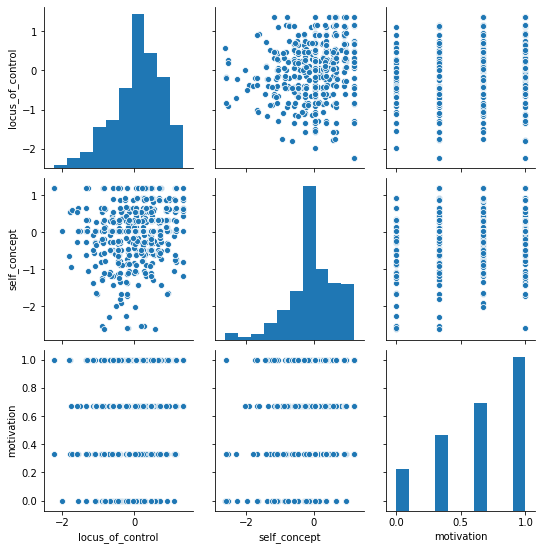

In [6]:
_ = sns.pairplot(psych)

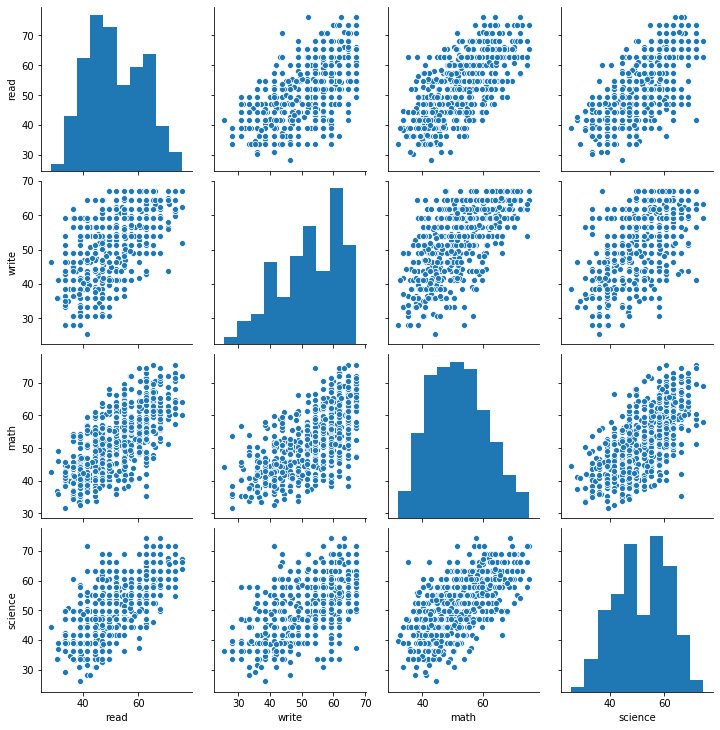

In [7]:
_ = sns.pairplot(acad)

## Попарные корреляции Пирсона:

In [8]:
np.corrcoef(acad.values.T)

array([[1.        , 0.62859089, 0.67927568, 0.69069291],
       [0.62859089, 1.        , 0.6326664 , 0.56914983],
       [0.67927568, 0.6326664 , 1.        , 0.64952612],
       [0.69069291, 0.56914983, 0.64952612, 1.        ]])

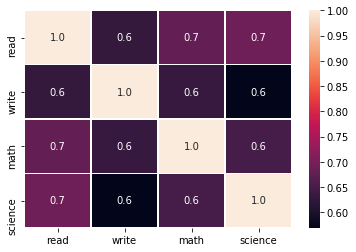

In [9]:
_ = sns.heatmap(acad.corr(),annot= True,linewidths=0.5,fmt = ".1f")

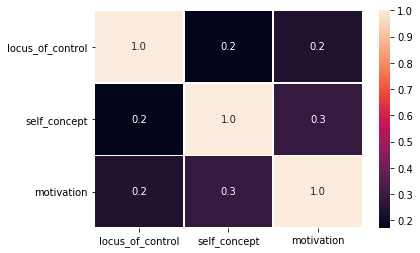

In [10]:
_ = sns.heatmap(psych.corr(),annot= True,linewidths=0.5,fmt = ".1f")

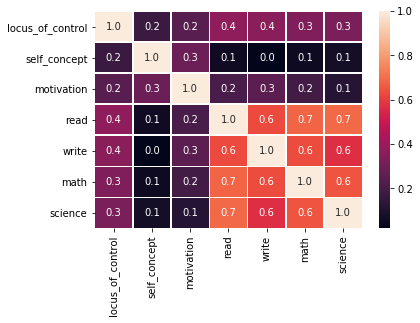

In [11]:
_ = sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f")

## Рассмотрим различные виды корреляций и их p-value:

In [12]:
for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], st.pearsonr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]]))

locus_of_control read (0.37356504947514746, 2.627397942780776e-21)
locus_of_control write (0.35887684208198034, 1.1221310828193684e-19)
locus_of_control math (0.3372689906279466, 1.9917161890303434e-17)
locus_of_control science (0.32462693700179457, 3.43272775288557e-16)
self_concept read (0.06065584275433425, 0.1378017616955153)
self_concept write (0.01944856136434244, 0.6344719269001144)
self_concept math (0.05359770276536925, 0.189832437244966)
self_concept science (0.06982633008189817, 0.08746792544962763)
motivation read (0.2106099227620145, 1.9231051438991602e-07)
motivation write (0.25424817594744153, 2.633931797328235e-10)
motivation math (0.19501347444887496, 1.485623794378294e-06)
motivation science (0.11566947603763428, 0.0045549410882496)


In [13]:
for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(st.spearmanr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

locus_of_control read (0.3601422423341907, 8.182164140514947e-20)
locus_of_control write (0.3326876192140294, 5.674711505007227e-17)
locus_of_control math (0.3225522195783023, 5.408667273460768e-16)
locus_of_control science (0.3215329829066887, 6.753570845305499e-16)
self_concept read (0.058959225643501326, 0.14917728669821054)
self_concept write (0.0009876523305436765, 0.9807393426267061)
self_concept math (0.05295277040718571, 0.195224790906198)
self_concept science (0.07254548904852522, 0.07579411550378315)
motivation read (0.22080414432688594, 4.6319977393767886e-08)
motivation write (0.24538948706687314, 1.1176188340096665e-09)
motivation math (0.20002230854047498, 7.839987024703352e-07)
motivation science (0.12494683254038573, 0.0021679726701835317)


In [14]:
for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(st.kendalltau(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

locus_of_control read (0.2549891700025268, 1.8707311013229983e-19)
locus_of_control write (0.2324269431102833, 1.921320449347359e-16)
locus_of_control math (0.22286026125211567, 6.952487589453992e-16)
locus_of_control science (0.22386883601423635, 2.2543001215520317e-15)
self_concept read (0.042930650362777545, 0.1379875181592871)
self_concept write (0.0008338420817723117, 0.9770031011184159)
self_concept math (0.03675661445701106, 0.19353409316058012)
self_concept science (0.05185415907506973, 0.07294209790425857)
motivation read (0.17125866595933992, 6.547083123687681e-08)
motivation write (0.18978983397873647, 2.084379717223148e-09)
motivation math (0.15164938685182405, 9.663004696291994e-07)
motivation science (0.09661858988866079, 0.00228136842294022)
